# Getting Started With Robot Inverse Kinematics (IK)

Welcome to the first guide in the series of getting started with Dr.QP robot Inverse Kinematics (IK).
In this guide, we will cover the basics of IK and how to use it to control a robot.

## What is Inverse Kinematics?
Inverse Kinematics (IK) is a technique used in robotics to determine the joint angles required to achieve a desired end-effector position. It is the process of solving the inverse problem of forward kinematics, which calculates the end-effector position given the joint angles.

## Why is Inverse Kinematics Important?
Inverse Kinematics is important because it allows robots to perform complex movements and tasks. By calculating the joint angles required to reach a specific position, robots can navigate their environment and interact with objects more effectively.

## How to Use Inverse Kinematics
To use Inverse Kinematics, you need to have a model of your robot's kinematics. This model includes the lengths of the robot's links and the joint angles. Once you have this model, you can use it to calculate the joint angles required to achieve a desired end-effector position.

## Setting up the Jupyter notebook

Before we start, lets configure matplotlib to display plots inline:

In [82]:
%matplotlib inline

As well as enable live python modules reloading, so you can change the code in sibling files and see the results immediately without restarting the kernel

In [83]:
# Enable python modules live reloading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The robot model

For this tutorial we will use the simplest part of Dr.QP robot - a single leg.

It has a 3 degrees of freedom and consists of 3 links:
 - coxa (hip)
 - femur (thigh)
 - tibia (shin)
 
and 3 joints:
 - alpha (coxa joint, hip joint)
 - beta (femur joint, thigh joint)
 - gamma (tibia joint, shin joint)

Links have only single property - length. They are connected to each other with joints. Joints have only single property - angle.

The diagrams below will make it much more clear, I promise, so just keep reading.

The values below are the default parameters for the simulated leg used in this tutorial.

In [84]:
coxa_length = 3
femur_length = 4
tibia_length = 7

alpha = 0 # controls coxa angle, 0 is straight
beta = 0 # controls femur angle, 0 is straight
gamma = 0 # controls tibia angle, 0 is straight

## Forward kinematics

Before we dive into the details of how inverse kinematics works, let's first get familiar with forward kinematics. The forward kinematics of the robotic leg is the process of calculating the position of the foot based on the angles of the joints.

Coxa, femur and tibia are represented with vector that is rotated at its base. Each next link starts at the ened of the previous link.
The starting point is (0, 0).

In [85]:
from point import Point


def forward_kinematics(coxa_length, femur_length, tibia_length, alpha_rad, beta_rad, gamma_rad, start = Point(0, 0)):
    start.label = f'{alpha_rad=}rads'
    coxa = start + Point(coxa_length, 0, f'{beta_rad=}rads').rotate(alpha_rad)
    femur = coxa + Point(femur_length, 0, f'{gamma_rad=}rads').rotate(beta_rad)
    tibia = femur + Point(tibia_length, 0, 'Foot').rotate(gamma_rad)

    return [start, coxa, femur, tibia]


Radians is a natural way to represent angles in most of the math related to robotics, however most people are more used to degrees. Thus I will be using degrees in this notebook.

In [86]:
import numpy as np

def forward_kinematics_angles(coxa_length, femur_length, tibia_length, alpha, beta, gamma, start = Point(0, 0)):
    alpha_rad = np.radians(alpha)
    beta_rad = np.radians(beta) + alpha_rad
    gamma_rad = np.radians(gamma) + beta_rad

    start, coxa, femur, tibia = forward_kinematics(coxa_length, femur_length, tibia_length, alpha_rad, beta_rad, gamma_rad, start=start)
    start.label = f'{alpha=}°'
    coxa.label = f'{beta=}°'
    femur.label = f'{gamma=}°'
    return start, coxa, femur, tibia


First, lets see how our leg looks in the neutral position. It is a straight line going from start point at (0, 0) and ending with the `Foot`

(<Figure size 1000x1000 with 1 Axes>,
  <matplotlib.collections.PathCollection at 0x771eaca5cc80>])

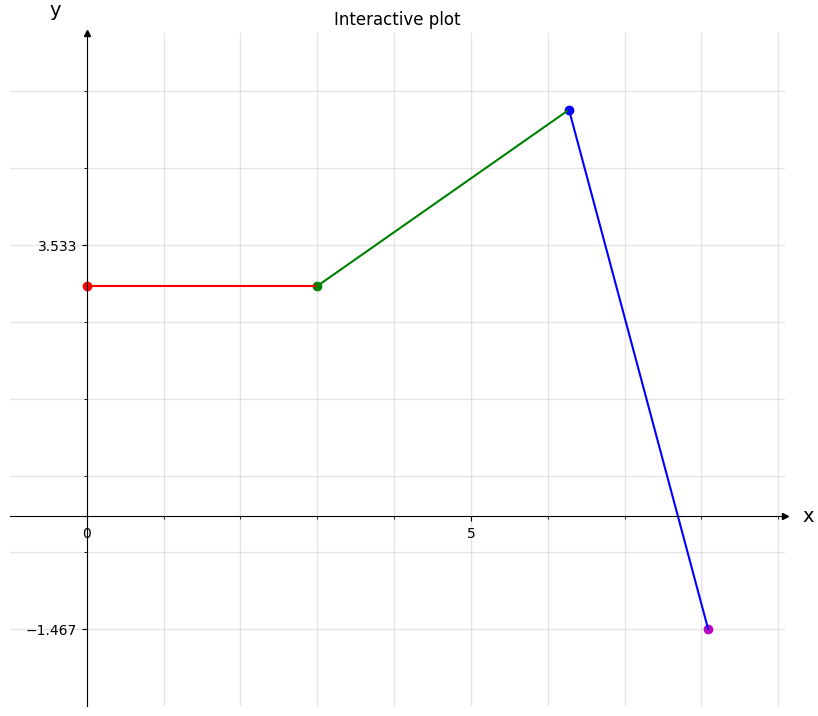

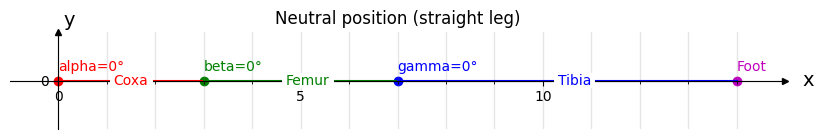

In [87]:
from plotting import plot_leg_with_points

points = forward_kinematics_angles(coxa_length, femur_length, tibia_length, alpha, beta, gamma)

%matplotlib inline
plot_leg_with_points(points, 'Neutral position (straight leg)')

Now lets try changing some angles to see how it behaves. Feel free to experiment with different values.

(<Figure size 1000x1000 with 1 Axes>,
  <matplotlib.collections.PathCollection at 0x771eac93cb60>])

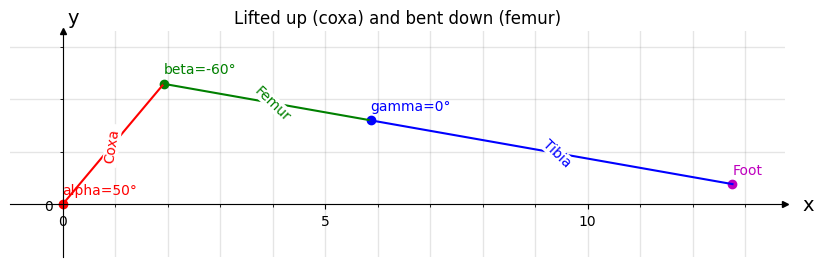

In [88]:
points = forward_kinematics_angles(coxa_length, femur_length, tibia_length, 50, -60, 0)

%matplotlib inline
plot_leg_with_points(points, 'Lifted up (coxa) and bent down (femur)')


(<Figure size 1000x1000 with 1 Axes>,
  <matplotlib.collections.PathCollection at 0x771eac8100b0>])

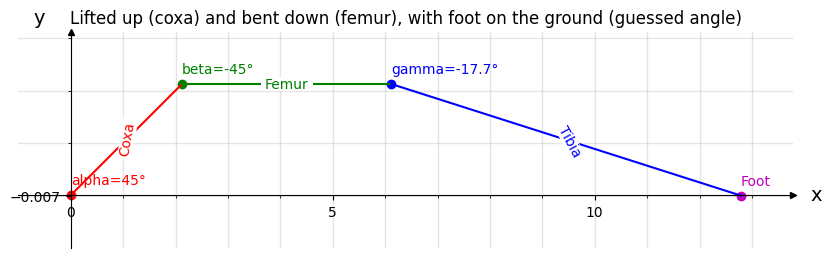

In [89]:
points = forward_kinematics_angles(coxa_length, femur_length, tibia_length, 45, -45, -17.7)

%matplotlib inline
plot_leg_with_points(points, 'Lifted up (coxa) and bent down (femur), with foot on the ground (guessed angle)')

## Exercise 1. Forward kinematics. Find angles at which the leg is on the ground

Its time to have a little fun with our robot.

Using the sliders on the interactive diagram below try to find angles at which the foot is on the ground.

interactive(children=(FloatSlider(value=0.0, description='alpha', max=180.0, min=-180.0), FloatSlider(value=35…

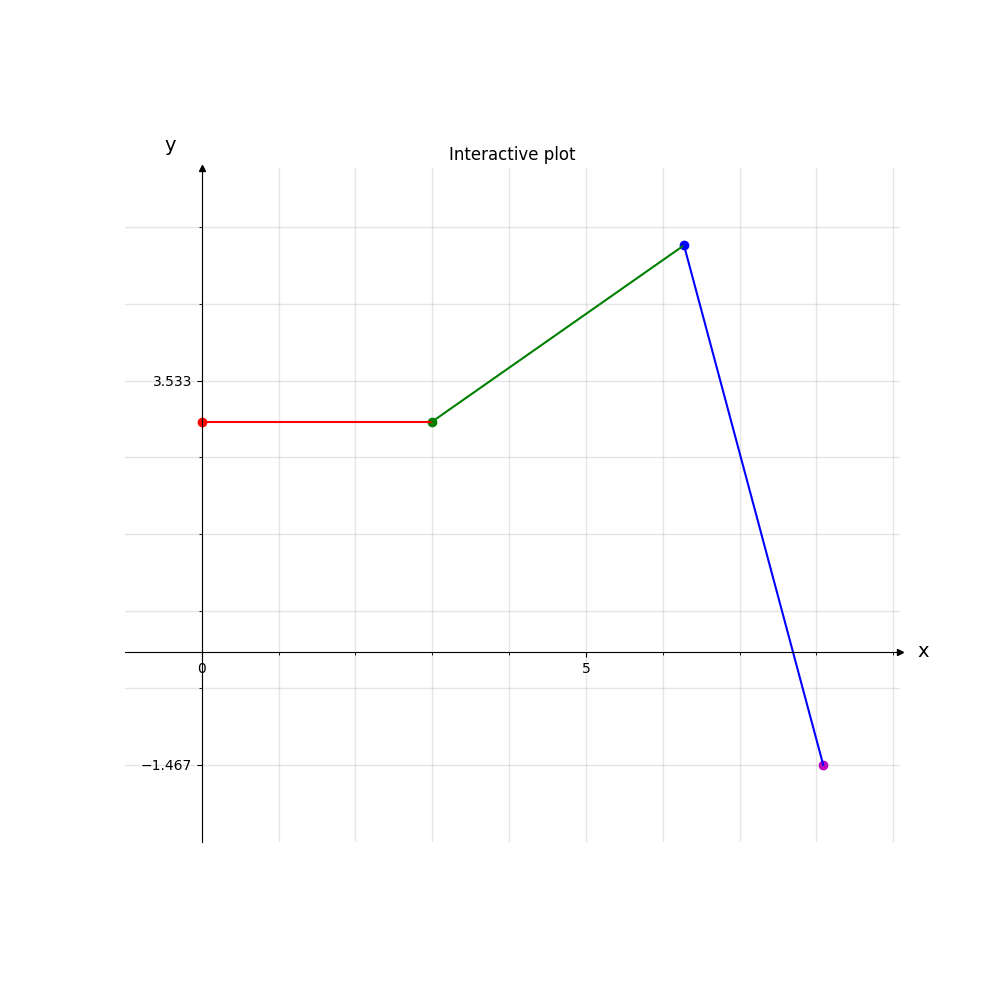

In [91]:
from ipywidgets import interactive
import numpy as np
import matplotlib.pyplot as plt

from plotting import plot_leg_update_lines


%matplotlib widget
start=Point(0, 3)
alpha=0
beta=35
gamma=-110
points = forward_kinematics_angles(coxa_length, femur_length, tibia_length, alpha, beta, gamma, start=start)
fig, lines, joints = plot_leg_with_points(points, 'Interactive plot', no_labels=True)

def update(alpha=alpha, beta=beta, gamma=gamma):
    points = forward_kinematics_angles(coxa_length, femur_length, tibia_length, alpha, beta, gamma, start=start)
    plot_leg_update_lines(points, lines, joints)
    fig.canvas.draw_idle()

interactive(update,
            alpha=(-180, 180, 0.1),
            beta=(-180, 180, 0.1),
            gamma=(-180, 180, 0.1))
